In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('Sub_Amphibole.csv')
df2 = pd.read_csv('Col_Amphibole.csv')

arc_p  = df1['arc P_MPa'].values
arc_dp = df1['arc Absolute error_P_MPa'].values
col_p  = df2['col P_MPa'].values
col_dp = df2['col Absolute error_P_MPa'].values

arc_t  = df1['arc T'].values
arc_dt = df1['arc Absolute error_T'].values
col_t  = df2['col T'].values
col_dt = df2['col Absolute error_T'].values

In [2]:
N = 100000
diff_meds_p = np.empty(N)
diff_meds_t = np.empty(N)

for i in range(N):
    arc_sim_p = np.random.uniform(arc_p - arc_dp, arc_p + arc_dp)
    col_sim_p = np.random.uniform(col_p - col_dp, col_p + col_dp)
    arc_sim_t = np.random.uniform(arc_t - arc_dt, arc_t + arc_dt)
    col_sim_t = np.random.uniform(col_t - col_dt, col_t + col_dt)
    
    diff_meds_p[i] = np.median(arc_sim_p) - np.median(col_sim_p)
    diff_meds_t[i] = np.median(arc_sim_t) - np.median(col_sim_t)

ci_p_low, ci_p_high = np.percentile(diff_meds_p, [2.5, 97.5])
ci_t_low, ci_t_high = np.percentile(diff_meds_t, [2.5, 97.5])



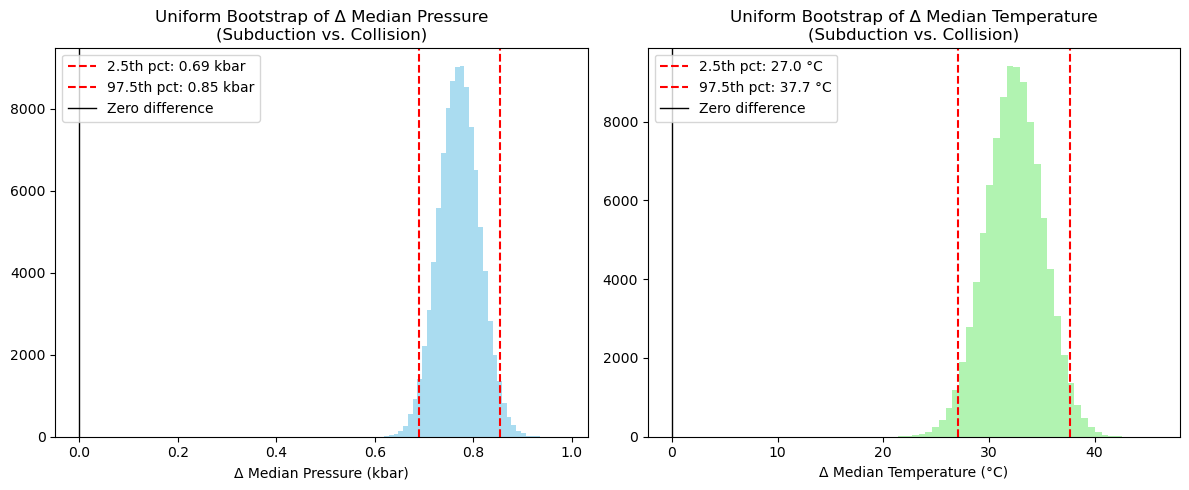

Pressure Δmedian 95% CI: [0.69, 0.85] kbar
Temperature Δmedian 95% CI: [27.0, 37.7] °C


In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(diff_meds_p, bins=40, density=False, alpha=0.7, color='skyblue')
plt.axvline(ci_p_low,  color='red', linestyle='--', label=f'2.5th pct: {ci_p_low:.2f} kbar')
plt.axvline(ci_p_high, color='red', linestyle='--', label=f'97.5th pct: {ci_p_high:.2f} kbar')
plt.axvline(0, color='k', linewidth=1, label='Zero difference')
plt.title('Uniform Bootstrap of Δ Median Pressure\n(Subduction vs. Collision)')
plt.xlabel('Δ Median Pressure (kbar)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(diff_meds_t, bins=40, density=False, alpha=0.7, color='lightgreen')
plt.axvline(ci_t_low,  color='red', linestyle='--', label=f'2.5th pct: {ci_t_low:.1f} °C')
plt.axvline(ci_t_high, color='red', linestyle='--', label=f'97.5th pct: {ci_t_high:.1f} °C')
plt.axvline(0, color='k', linewidth=1, label='Zero difference')
plt.title('Uniform Bootstrap of Δ Median Temperature\n(Subduction vs. Collision)')
plt.xlabel('Δ Median Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.savefig("PT_median_diff_bootstrap.svg", format="svg")
plt.show()

print(f'Pressure Δmedian 95% CI: [{ci_p_low:.2f}, {ci_p_high:.2f}] kbar')
print(f'Temperature Δmedian 95% CI: [{ci_t_low:.1f}, {ci_t_high:.1f}] °C')